In [ ]:
# pip install plotly_express 

In [1]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)

In [2]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#### f, ax 사용하기

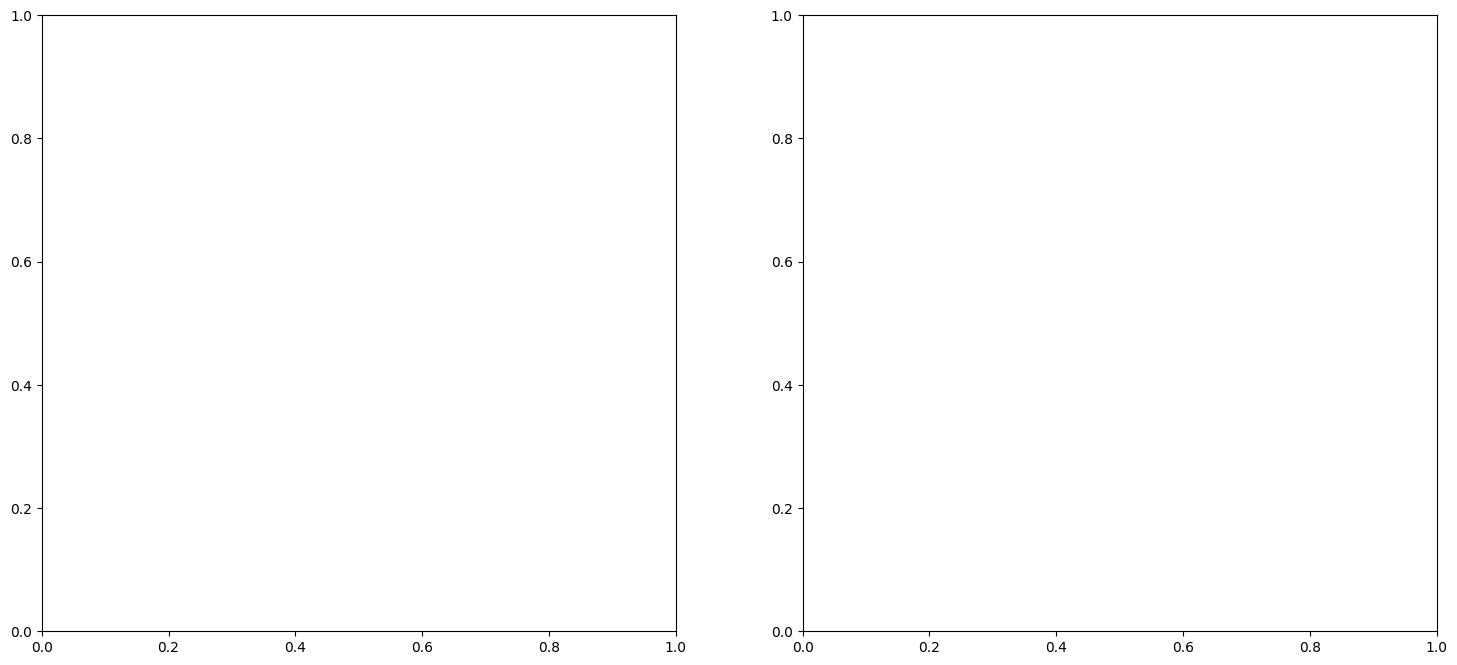

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) 

In [18]:
len(ax)

2

#### 생존상황 전체

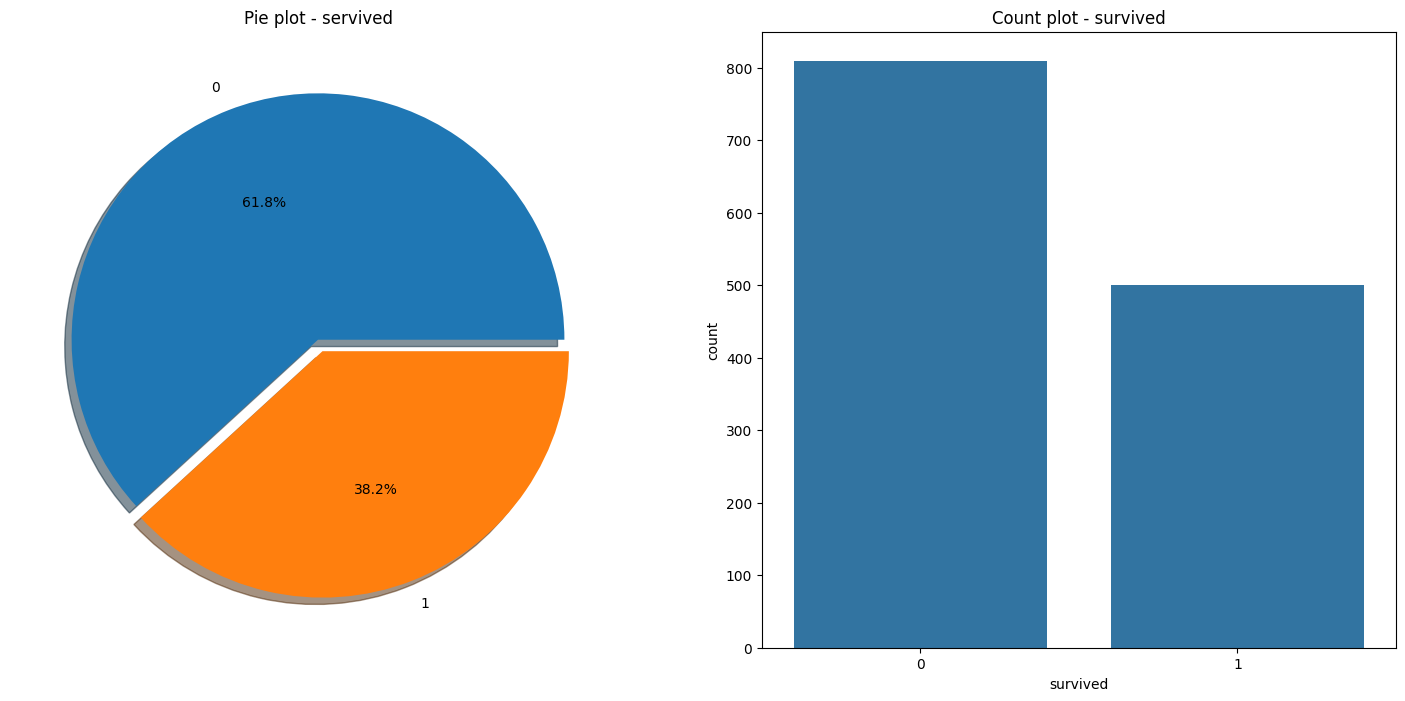

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True, explode=[0, 0.05])
ax[0].set_title('Pie plot - servived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

#### 성별에 따른 생존 현황

Text(0.5, 1.0, 'Sex : survived ')

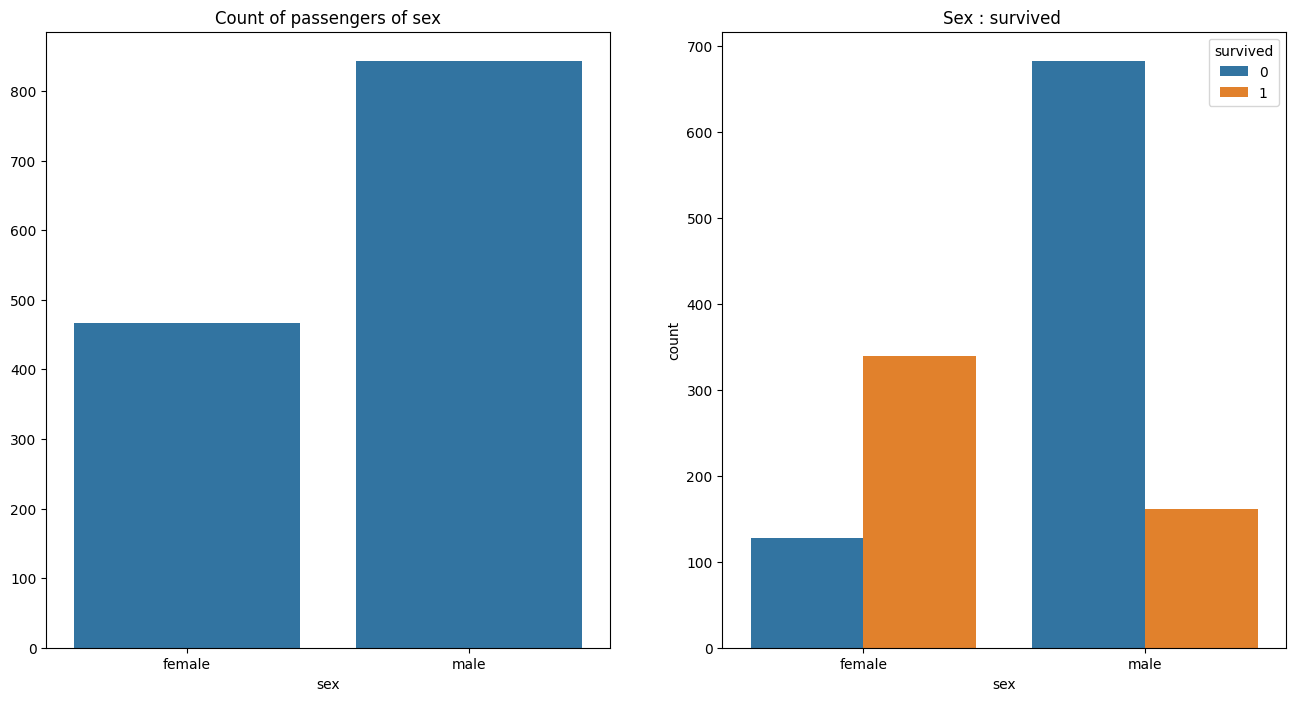

In [27]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of passengers of sex')
ax[0].set_ylabel('')

sns.countplot(x='sex', data=titanic, hue='survived',ax=ax[1])
ax[1].set_title('Sex : survived ')

```
탑승객 중 남성 비율이 대략 2배이나 여성의 생존 인원 보다 더 낮음
-> 남성의 생존 가능성이 더 낮다. 
```

#### 경제력 대비 생존률

In [30]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


```
1등실의 생존 가능성이 아주 높다.
+ 여성의 생존률도 높다.
=> 1등실에 여성이 많이 타고 있었을까 ?
```

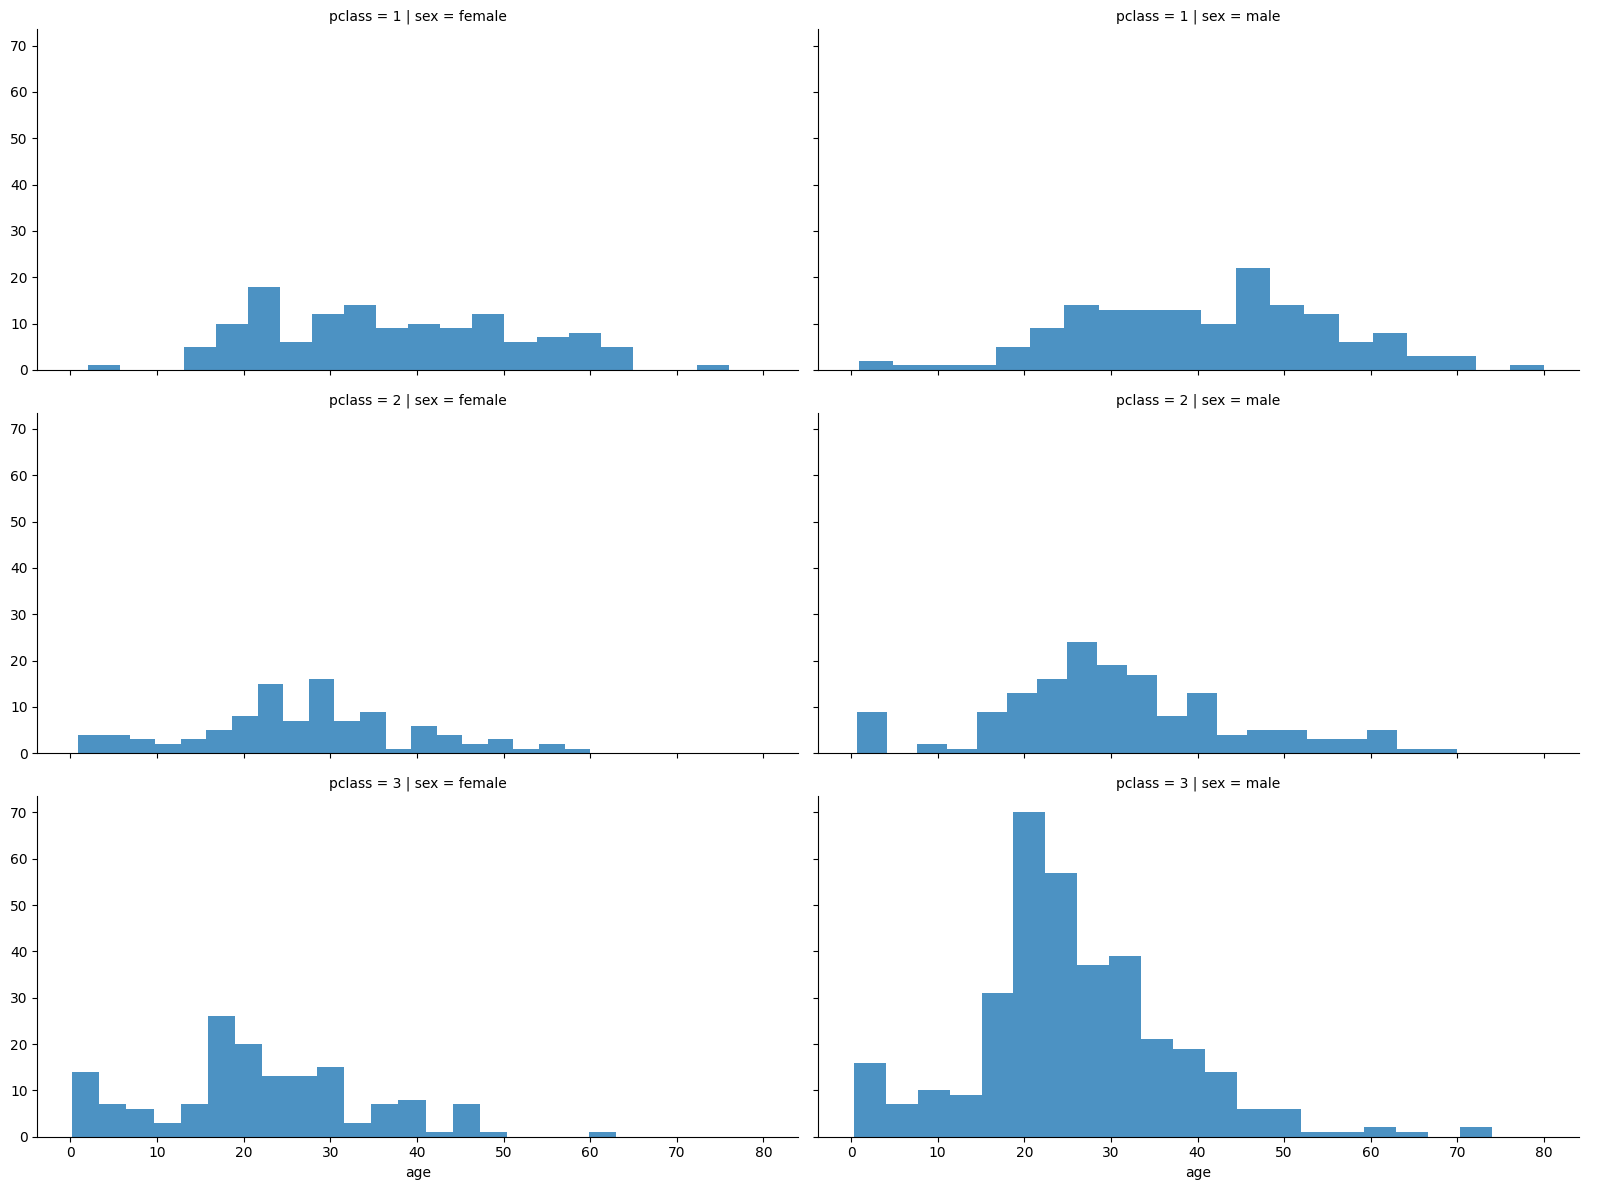

In [35]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
grid.add_legend();

```
-> 3등실에는 남성이 많았다. (특히 20대 남성)
```